## Prédiction/Classification du Cancer des Seins

Ce projet vise à résoudre un problème concernant une classification des patients ayant le cancer des eins et ceux n'ayant pas le cancer. Un modèle pareil aidera les hôpitaux en terme de decision making sur les nouveaux patients avec les mêmes données cliniques.

## 1. Lecture de données

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/home/fouba/Documents/Tech4Tchad/python/MachineLearning/group/Cancer/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


## 2. Analyse Exploratoire et Visualisation des données

In [5]:
df['diagnosis'].unique()

array([0, 1])

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns



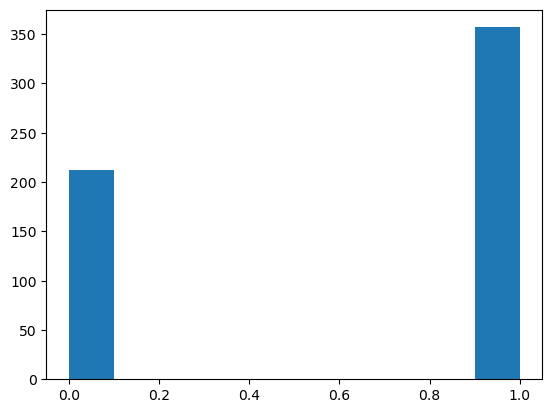

In [66]:
plt.hist(df["diagnosis"])
# Afficher le graphique
plt.show()

In [7]:
# on convertit les features en une liste de columns
columns = df.columns.tolist()
columns

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'diagnosis']

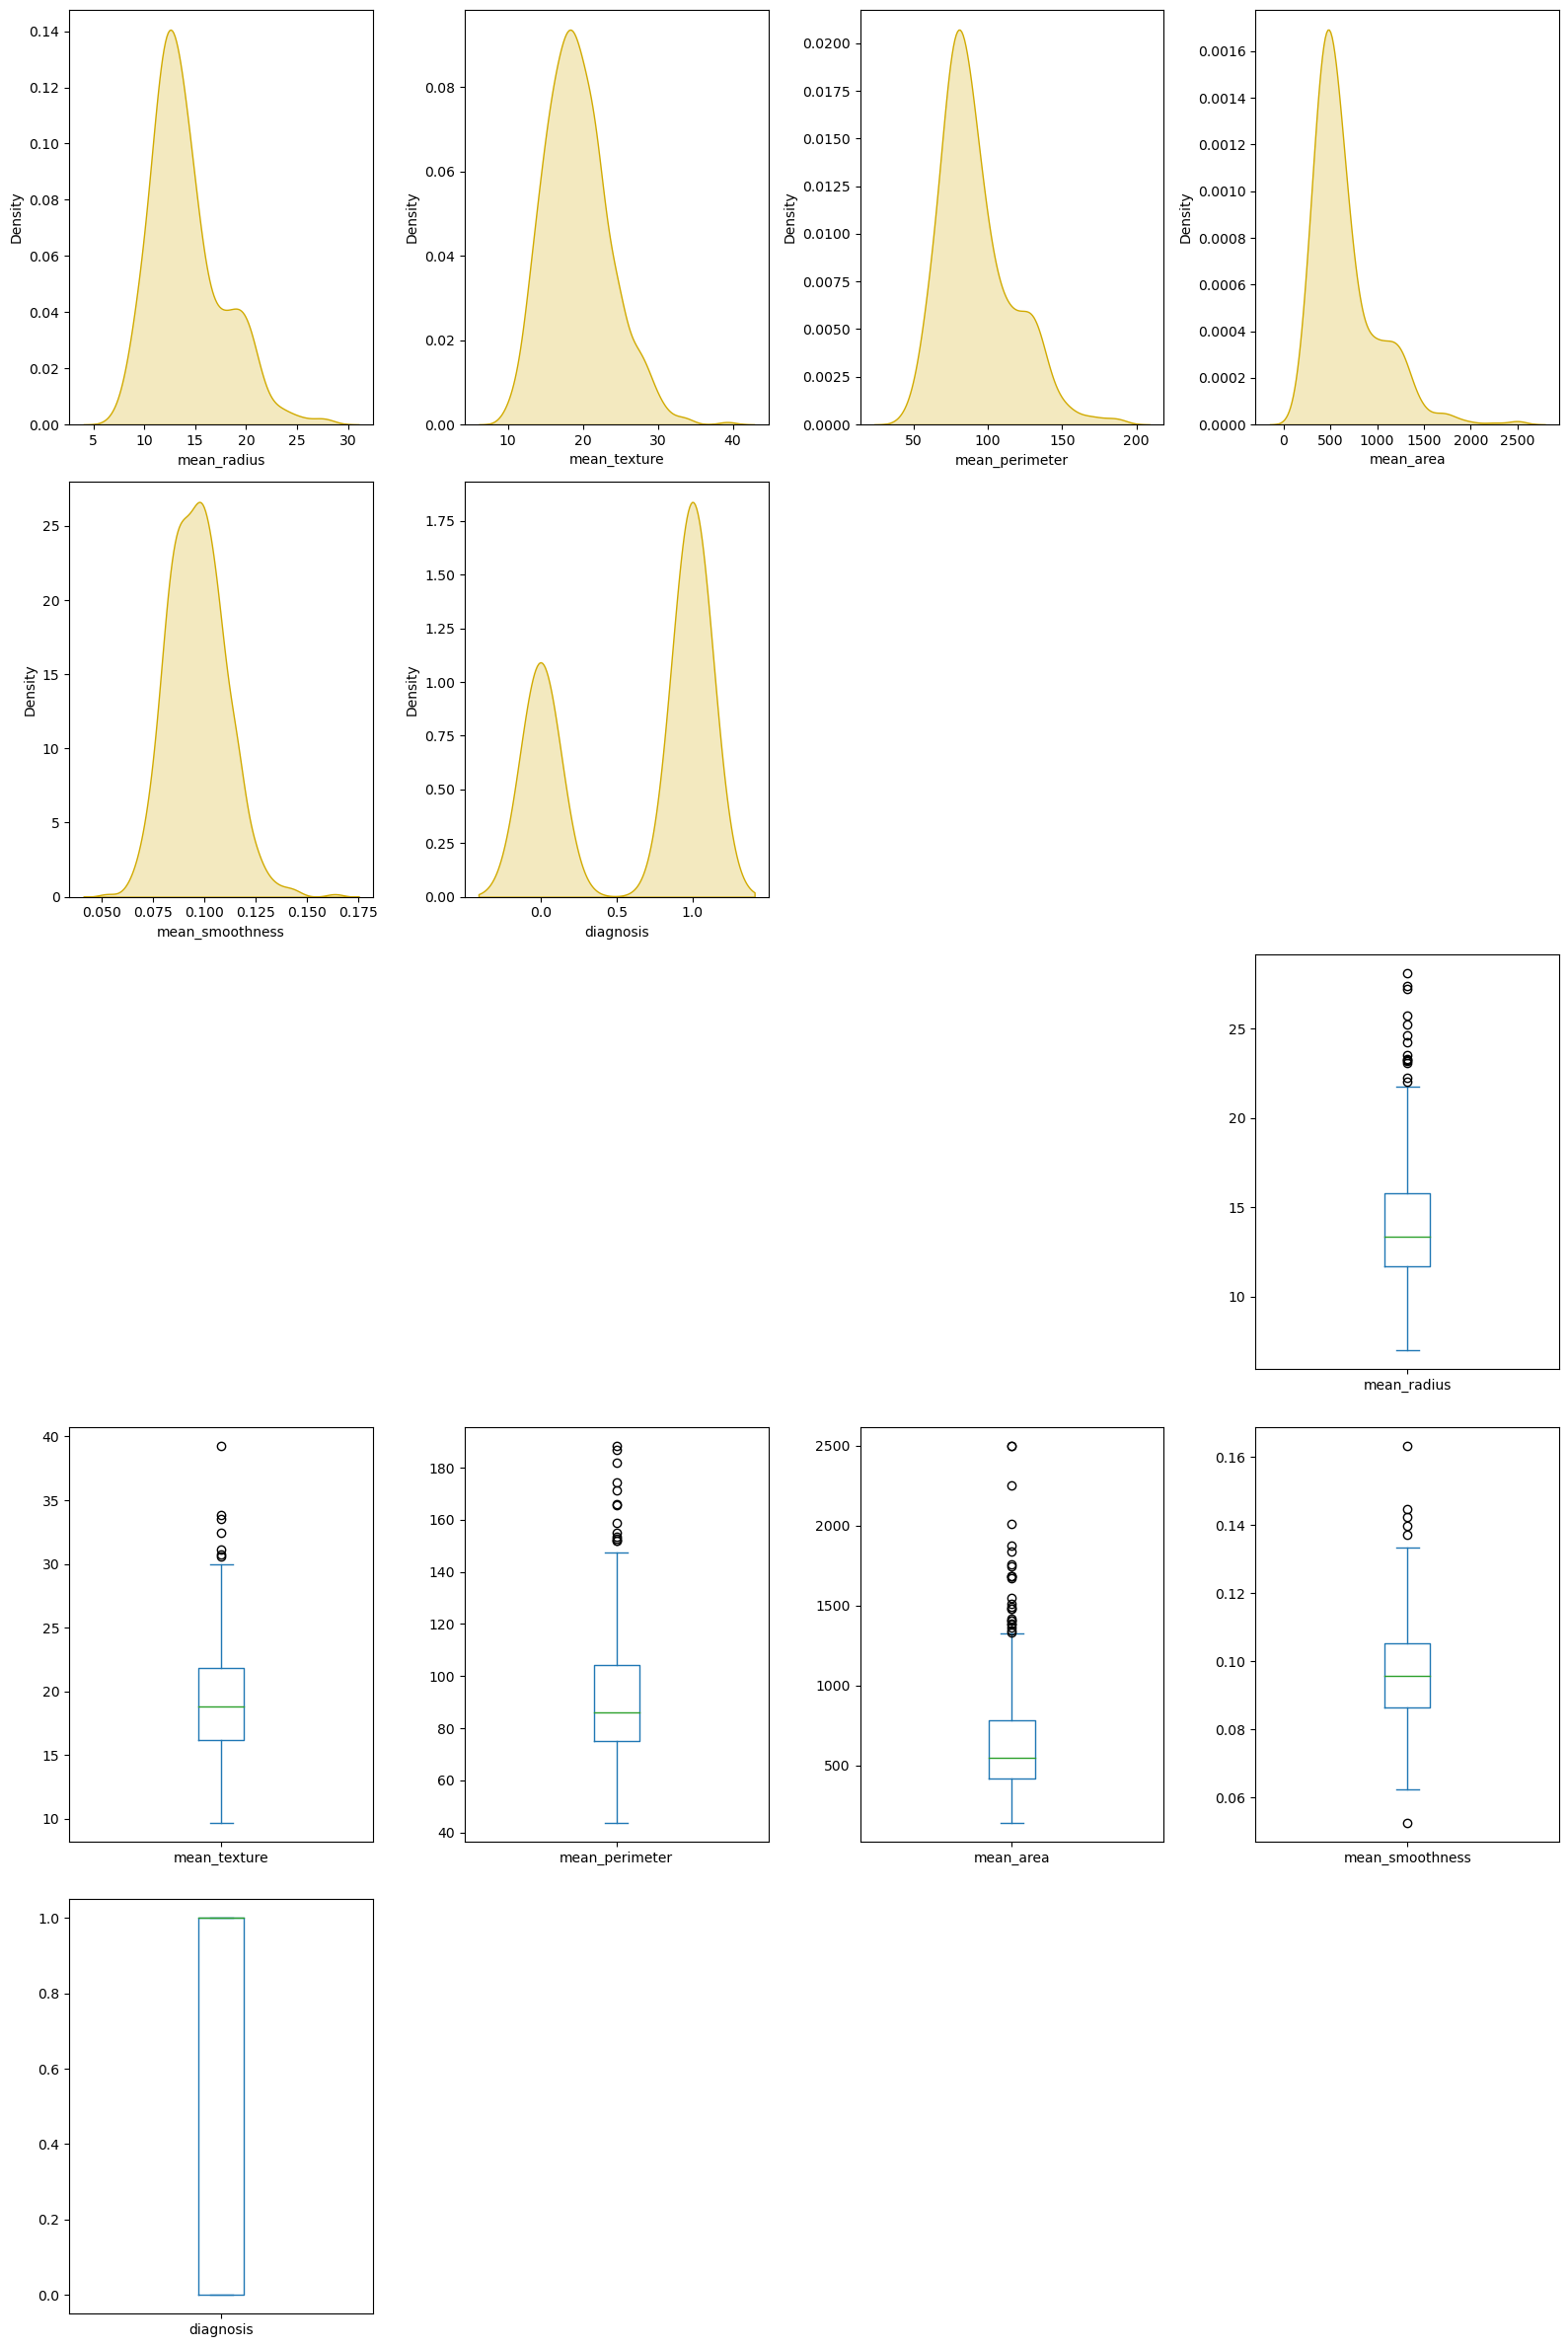

In [8]:
plt.figure(figsize=(16,38))

for i, col in enumerate(columns, 1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], color = '#d1aa00', fill = True)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout()
plt.show()


## 3. Traitement des Valeurs abbérrantes

Vérifions si notre dataset ne comporte pas de  valeurs nulles

In [9]:
 df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

Donc il n'ya pas de valeur nulle. Vérifions s'il existe de NaN.

In [10]:
 df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

Aucune valeur NaN non plus. Assurons-nous une fois qu'il n'ya pas de valeurs dupliquées.   

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

Le resultat nous montre qu'il ya aucune valeur dupliquée. Notre dataset est propre pour faire la prédiction/Classification

Faisons le test de skewness et kurtosis pour voir les valeurs disparates ( outliers)

In [12]:
pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
skewness,0.942380,0.650450,0.990650,1.645732,0.456324,-0.528461
kurtosis,0.845522,0.758319,0.972214,3.652303,0.855975,-1.726811


In [13]:

from scipy.stats import zscore


for i in columns:
    y_outliers = df[abs(zscore(df[i])) >= 3 ]
    print('Le nombre des outliers de ',i,'est ',len(y_outliers))
    y_outliers
    


Le nombre des outliers de  mean_radius est  5
Le nombre des outliers de  mean_texture est  4
Le nombre des outliers de  mean_perimeter est  7
Le nombre des outliers de  mean_area est  8
Le nombre des outliers de  mean_smoothness est  5
Le nombre des outliers de  diagnosis est  0


## 4.  Préparation du Modèle 

Créons une colonne comme signification du target diagnosis.

In [14]:
def tumeur_colonne(diagnosis):
    if diagnosis == 1:
        return "Maligne"
    else:
        return "Benigne"

df['Tumeur'] = df['diagnosis'].apply(tumeur_colonne)
df.sample(frac=1).head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,Tumeur
3,11.420,20.38,77.58,386.1,0.14250,0,Benigne
70,18.940,21.31,123.60,1130.0,0.09009,0,Benigne
539,7.691,25.44,48.34,170.4,0.08668,1,Maligne
127,19.000,18.91,123.40,1138.0,0.08217,0,Benigne
202,23.290,26.67,158.90,1685.0,0.11410,0,Benigne


De ce fait , transformons notre colonne en une liste. Elle nous permettra d'avoir une idée sur le nombre de chaque tumeur.

In [15]:
tumeur = df['Tumeur'].tolist()
print("Le nombre de valeur maligne est : ", tumeur.count('Maligne'))
print("Le nombre de valeur Benigne est : ", tumeur.count('Benigne'))

Le nombre de valeur maligne est :  357
Le nombre de valeur Benigne est :  212


## 5. Entrainement du Modèle

In [16]:
X = df.iloc[:, 1:5].values
Y = df.iloc[:, 5].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### La matrice de confusion
La matrice de confusion est un outil de mesure de la performance des modèles de classification à 2 classes ou plus. 

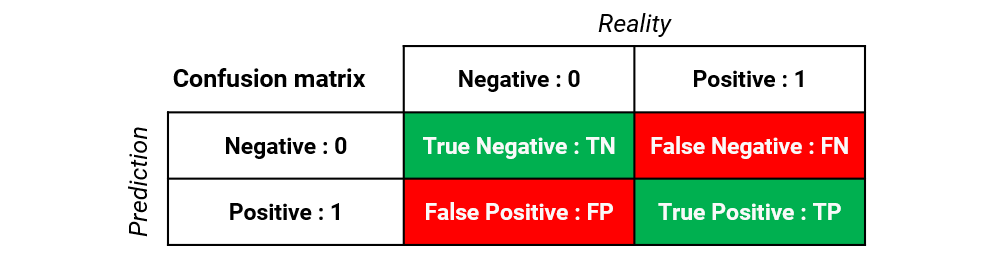

Dans une matrice de confusion, on peut avoir ce genre  de cas  :
- Le Vrai Positif (vp )
- Le Faux Positif (fp)
- Le Vrai Negatif (vn)
- Le Faux Négatif (fn)
    

Implémentons chacun de ces cas dans nos différents modèles :

In [20]:
import sklearn.linear_model as sk
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Regression Linéaire.

In [97]:
classifier_LR = LinearRegression()
classifier_LR.fit(X_train, Y_train)

LinearRegression()

In [98]:
print("Le score est  :")
classifier_LR.score(X_test, Y_test)

Le score est  :


0.6316916969686668

Le score est très faible,déterminons l'erreur.

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [101]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)

L'erreur  est :


0.0859127881783686

### 5.1 Regression Logistique.

In [93]:

classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [94]:
print("Le score est  :")
classifier_RL.score(X_test, Y_test)

Le score est  :


0.9300699300699301

In [95]:
Y_pred = classifier_RL.predict(X_test)


Déterminons la valeur de l'erreur.

In [102]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [104]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
print("L'erreur est :")
mean_squared_error(predictions, Y_test)

L'erreur est :


0.06993006993006994

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[48,  5],
       [ 5, 85]])

Voici sa matrice de confusion : 

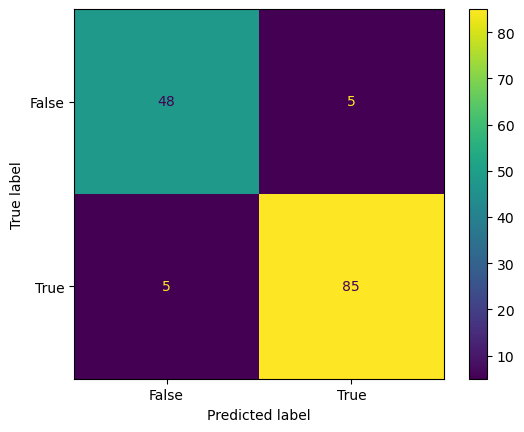

In [25]:

import sklearn.metrics as metrics
confusion_matrix = confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Déterminons le nombre de vrai positif(vp),vrai négatif(vn), faux positif(fp),faux négatif(fn),

In [26]:

vn, fp, fn, vp = confusion_matrix.ravel()
 
print("Vrai Positive (VP): ", vp)
print("Vrai Negative (VN): ", vn)
print("Faux Positive (FP): ", fp)
print("Faux Negative (FN): ", fn)
 
# Calcul de accuracy
accuracy = (vp + vn) / (vp + vn + fp + fn)
 
# Calcul de precision
precision = vp / (vp + fp)
 
# Calcul de recall
recall = vp / (vp + fn)
 
# Calcul de F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormule de calcul:")
print("Accuracy: (VP + VN) / (VP + VN + FP + FN)")
print("Precision: VP / (VP + FP)")
print("Recall: VP / (VP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 
print("\n\nRésulats:")
print("Accuracy: ", round(accuracy, 14))
print("Precision: ", round(precision, 14))
print("Recall: ", round(recall, 14))
print("F1-score: ", round(f1_score, 14))

Vrai Positive (VP):  85
Vrai Negative (VN):  48
Faux Positive (FP):  5
Faux Negative (FN):  5


Formule de calcul:
Accuracy: (VP + VN) / (VP + VN + FP + FN)
Precision: VP / (VP + FP)
Recall: VP / (VP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Résulats:
Accuracy:  0.93006993006993
Precision:  0.94444444444444
Recall:  0.94444444444444
F1-score:  0.94444444444444


### 5.2 KNeighbors Classifier

In [27]:
classifier_KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KN.fit(X_train, Y_train)

KNeighborsClassifier()

In [105]:
print("Le score est  :")
classifier_KN.score(X_test, Y_test)

Le score est  :


0.8881118881118881

In [29]:
Y_pred = classifier_KN.predict(X_test)


Détermination de l'erreur : 

In [113]:

model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train)


KNeighborsClassifier()

In [114]:

from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)

L'erreur  est :


0.11188811188811189

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[44,  9],
       [ 7, 83]])

Voici sa matrice de confusion : 

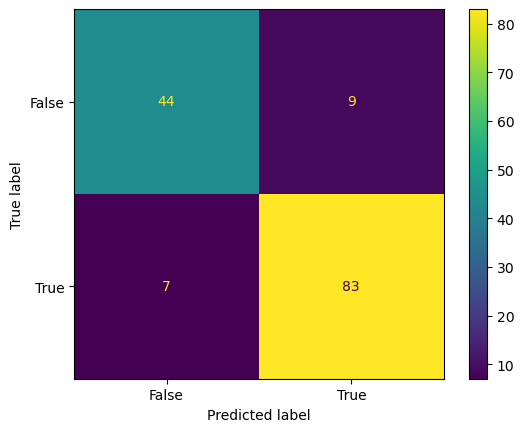

In [31]:

import sklearn.metrics as metrics
confusion_matrix = confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Déterminons le nombre de vrai positif(vp),vrai négatif(vn), faux positif(fp),faux négatif(fn),

In [32]:

vn, fp, fn, vp = confusion_matrix.ravel()
 
print("Vrai Positive (VP): ", vp)
print("Vrai Negative (VN): ", vn)
print("Faux Positive (FP): ", fp)
print("Faux Negative (FN): ", fn)
 
# Calcul de accuracy
accuracy = (vp + vn) / (vp + vn + fp + fn)
 
# Calcul de precision
precision = vp / (vp + fp)
 
# Calcul de recall
recall = vp / (vp + fn)
 
# Calcul de F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormule de calcul:")
print("Accuracy: (VP + VN) / (VP + VN + FP + FN)")
print("Precision: VP / (VP + FP)")
print("Recall: VP / (VP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 
print("\n\nRésulats:")
print("Accuracy: ", round(accuracy, 14))
print("Precision: ", round(precision, 14))
print("Recall: ", round(recall, 14))
print("F1-score: ", round(f1_score, 14))

Vrai Positive (VP):  83
Vrai Negative (VN):  44
Faux Positive (FP):  9
Faux Negative (FN):  7


Formule de calcul:
Accuracy: (VP + VN) / (VP + VN + FP + FN)
Precision: VP / (VP + FP)
Recall: VP / (VP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Résulats:
Accuracy:  0.88811188811189
Precision:  0.90217391304348
Recall:  0.92222222222222
F1-score:  0.91208791208791


### 5.3. SVC en utilisant Vector Machine Algorithm


In [33]:
from sklearn.svm import SVC
classifier_SVC1 = SVC(kernel = 'linear', random_state = 0)
classifier_SVC1.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [106]:
print("Le score est  :")
classifier_SVC1.score(X_test, Y_test)

Le score est  :


0.9230769230769231

Fixons l'erreur : 

In [115]:
from sklearn.metrics import mean_squared_error

model = SVC(kernel = 'linear', random_state = 0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)

L'erreur  est :


0.07692307692307693

In [35]:
from sklearn.ensemble import RandomForestClassifier
Y_pred = classifier_SVC1.predict(X_test)


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[47,  6],
       [ 5, 85]])

Voici sa matrice de confusion : 

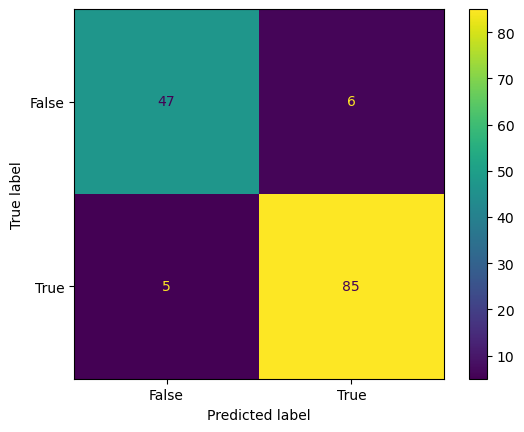

In [37]:

import sklearn.metrics as metrics
confusion_matrix = confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Déterminons le nombre de vrai positif(vp),vrai négatif(vn), faux positif(fp),faux négatif (fn).

In [38]:

vn, fp, fn, vp = confusion_matrix.ravel()
 
print("Vrai Positive (VP): ", vp)
print("Vrai Negative (VN): ", vn)
print("Faux Positive (FP): ", fp)
print("Faux Negative (FN): ", fn)
 
# Calcul de accuracy
accuracy = (vp + vn) / (vp + vn + fp + fn)
 
# Calcul de precision
precision = vp / (vp + fp)
 
# Calcul de recall
recall = vp / (vp + fn)
 
# Calcul de F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormule de calcul:")
print("Accuracy: (VP + VN) / (VP + VN + FP + FN)")
print("Precision: VP / (VP + FP)")
print("Recall: VP / (VP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 
print("\n\nRésulats:")
print("Accuracy: ", round(accuracy, 14))
print("Precision: ", round(precision, 14))
print("Recall: ", round(recall, 14))
print("F1-score: ", round(f1_score, 14))

Vrai Positive (VP):  85
Vrai Negative (VN):  47
Faux Positive (FP):  6
Faux Negative (FN):  5


Formule de calcul:
Accuracy: (VP + VN) / (VP + VN + FP + FN)
Precision: VP / (VP + FP)
Recall: VP / (VP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Résulats:
Accuracy:  0.92307692307692
Precision:  0.93406593406593
Recall:  0.94444444444444
F1-score:  0.93922651933702


### 5.4 SVC (Support Vector Class ) en utilisant Kernel  Support Vector Machine Algorithm


In [39]:
from sklearn.svm import SVC
classifier_SVC2 = SVC(kernel = 'rbf', random_state = 0)
classifier_SVC2.fit(X_train, Y_train)

SVC(random_state=0)

In [107]:
print("Le score est  :")
classifier_SVC2.score(X_test, Y_test)

Le score est  :


0.9090909090909091

In [116]:
from sklearn.metrics import mean_squared_error

model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)

L'erreur  est :


0.09090909090909091

In [41]:
Y_pred = classifier_SVC2.predict(X_test)


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[47,  6],
       [ 7, 83]])

Voici sa matrice de confusion : 

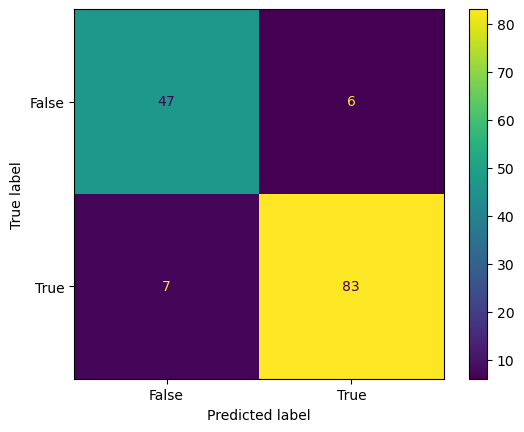

In [43]:

import sklearn.metrics as metrics
confusion_matrix = confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Déterminons le nombre de vrai positif(vp),vrai négatif(vn), faux positif(fp),faux négatif (fn).

In [44]:

vn, fp, fn, vp = confusion_matrix.ravel()
 
print("Vrai Positive (VP): ", vp)
print("Vrai Negative (VN): ", vn)
print("Faux Positive (FP): ", fp)
print("Faux Negative (FN): ", fn)
 
# Calcul de accuracy
accuracy = (vp + vn) / (vp + vn + fp + fn)
 
# Calcul de precision
precision = vp / (vp + fp)
 
# Calcul de recall
recall = vp / (vp + fn)
 
# Calcul de F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormule de calcul:")
print("Accuracy: (VP + VN) / (VP + VN + FP + FN)")
print("Precision: VP / (VP + FP)")
print("Recall: VP / (VP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 
print("\n\nRésulats:")
print("Accuracy: ", round(accuracy, 14))
print("Precision: ", round(precision, 14))
print("Recall: ", round(recall, 14))
print("F1-score: ", round(f1_score, 14))

Vrai Positive (VP):  83
Vrai Negative (VN):  47
Faux Positive (FP):  6
Faux Negative (FN):  7


Formule de calcul:
Accuracy: (VP + VN) / (VP + VN + FP + FN)
Precision: VP / (VP + FP)
Recall: VP / (VP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Résulats:
Accuracy:  0.90909090909091
Precision:  0.93258426966292
Recall:  0.92222222222222
F1-score:  0.92737430167598


## 5.5  Naïve Bayes Algorithm (GaussianNB)

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, Y_train)

GaussianNB()

In [108]:
print("Le score est  :")
classifier_NB.score(X_test, Y_test)

Le score est  :


0.9230769230769231

In [117]:
from sklearn.metrics import mean_squared_error

model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)

L'erreur  est :


0.07692307692307693

In [47]:
Y_pred = classifier_NB.predict(X_test)


In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[44,  9],
       [ 2, 88]])

Voici sa matrice de confusion : 

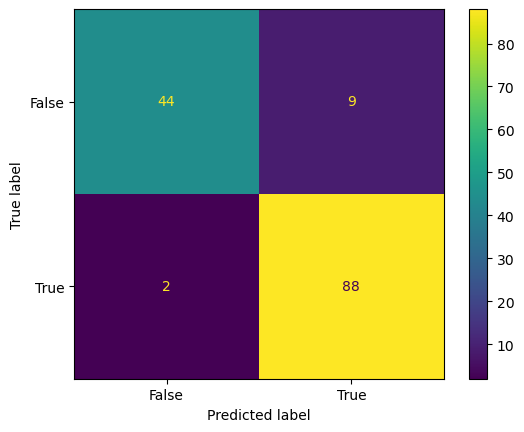

In [49]:

import sklearn.metrics as metrics
confusion_matrix = confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [50]:

vn, fp, fn, vp = confusion_matrix.ravel()
 
print("Vrai Positive (VP): ", vp)
print("Vrai Negative (VN): ", vn)
print("Faux Positive (FP): ", fp)
print("Faux Negative (FN): ", fn)
 
# Calcul de accuracy
accuracy = (vp + vn) / (vp + vn + fp + fn)
 
# Calcul de precision
precision = vp / (vp + fp)
 
# Calcul de recall
recall = vp / (vp + fn)
 
# Calcul de F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormule de calcul:")
print("Accuracy: (VP + VN) / (VP + VN + FP + FN)")
print("Precision: VP / (VP + FP)")
print("Recall: VP / (VP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 
print("\n\nRésulats:")
print("Accuracy: ", round(accuracy, 14))
print("Precision: ", round(precision, 14))
print("Recall: ", round(recall, 14))
print("F1-score: ", round(f1_score, 14))

Vrai Positive (VP):  88
Vrai Negative (VN):  44
Faux Positive (FP):  9
Faux Negative (FN):  2


Formule de calcul:
Accuracy: (VP + VN) / (VP + VN + FP + FN)
Precision: VP / (VP + FP)
Recall: VP / (VP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Résulats:
Accuracy:  0.92307692307692
Precision:  0.90721649484536
Recall:  0.97777777777778
F1-score:  0.94117647058824


## 5.6 Decision Tree Algorithm


In [51]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [109]:
print("Le score est  :")
classifier_DT.score(X_test, Y_test)

Le score est  :


0.9090909090909091

In [118]:
from sklearn.metrics import mean_squared_error

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)

L'erreur  est :


0.11888111888111888

In [53]:
Y_pred = classifier_DT.predict(X_test)


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[47,  6],
       [ 7, 83]])

Voici sa matrice de confusion : 

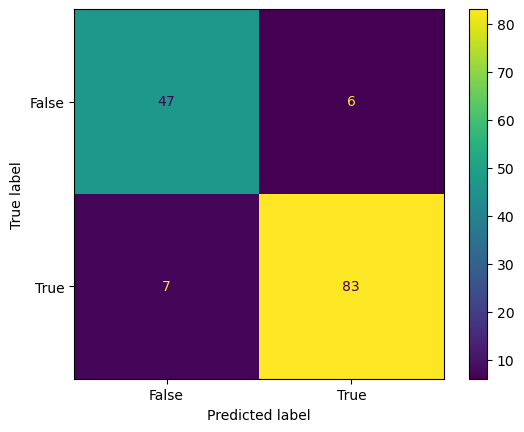

In [55]:

import sklearn.metrics as metrics
confusion_matrix = confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Déterminons le nombre de vrai positif(vp),vrai négatif(vn), faux positif(fp),faux négatif (fn).

In [56]:

vn, fp, fn, vp = confusion_matrix.ravel()
 
print("Vrai Positive (VP): ", vp)
print("Vrai Negative (VN): ", vn)
print("Faux Positive (FP): ", fp)
print("Faux Negative (FN): ", fn)
 
# Calcul de accuracy
accuracy = (vp + vn) / (vp + vn + fp + fn)
 
# Calcul de precision
precision = vp / (vp + fp)
 
# Calcul de recall
recall = vp / (vp + fn)
 
# Calcul de F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormule de calcul:")
print("Accuracy: (VP + VN) / (VP + VN + FP + FN)")
print("Precision: VP / (VP + FP)")
print("Recall: VP / (VP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 
print("\n\nRésulats:")
print("Accuracy: ", round(accuracy, 14))
print("Precision: ", round(precision, 14))
print("Recall: ", round(recall, 14))
print("F1-score: ", round(f1_score, 14))

Vrai Positive (VP):  83
Vrai Negative (VN):  47
Faux Positive (FP):  6
Faux Negative (FN):  7


Formule de calcul:
Accuracy: (VP + VN) / (VP + VN + FP + FN)
Precision: VP / (VP + FP)
Recall: VP / (VP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Résulats:
Accuracy:  0.90909090909091
Precision:  0.93258426966292
Recall:  0.92222222222222
F1-score:  0.92737430167598


## 5.7 Random Forest Classification algorithm


In [120]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [121]:
print("Le score est  :")
classifier_RF.score(X_test, Y_test)

Le score est  :


0.9300699300699301

In [125]:
Y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [59]:
Y_pred = classifier_RF.predict(X_test)


Cherchons valeur de l'erreur.

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("L'erreur  est:")
mean_squared_error(predictions, Y_test)

L'erreur  est:


0.06293706293706294

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[48,  5],
       [ 5, 85]])

Voici sa matrice de confusion : 

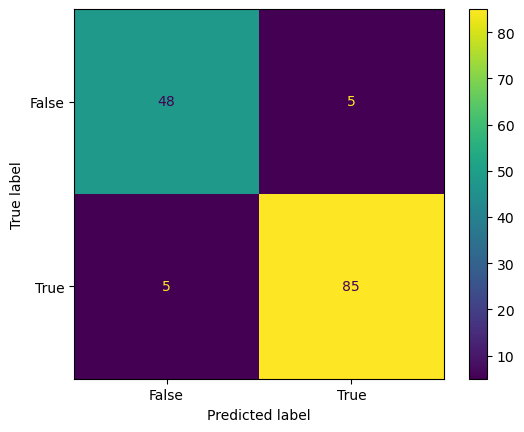

In [61]:


confusion_matrix = confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Déterminons le nombre de vrai positif(vp),vrai négatif(vn), faux positif(fp),faux négatif (fn).

In [62]:

vn, fp, fn, vp = confusion_matrix.ravel()
 
print("Vrai Positive (VP): ", vp)
print("Vrai Negative (VN): ", vn)
print("Faux Positive (FP): ", fp)
print("Faux Negative (FN): ", fn)
 
# Calcul de accuracy
accuracy = (vp + vn) / (vp + vn + fp + fn)
 
# Calcul de precision
precision = vp / (vp + fp)
 
# Calcul de recall
recall = vp / (vp + fn)
 
# Calcul de F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormule de calcul:")
print("Accuracy: (VP + VN) / (VP + VN + FP + FN)")
print("Precision: VP / (VP + FP)")
print("Recall: VP / (VP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 
print("\n\nRésulats:")
print("Accuracy: ", round(accuracy, 14))
print("Precision: ", round(precision, 14))
print("Recall: ", round(recall, 14))
print("F1-score: ", round(f1_score, 14))

Vrai Positive (VP):  85
Vrai Negative (VN):  48
Faux Positive (FP):  5
Faux Negative (FN):  5


Formule de calcul:
Accuracy: (VP + VN) / (VP + VN + FP + FN)
Precision: VP / (VP + FP)
Recall: VP / (VP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Résulats:
Accuracy:  0.93006993006993
Precision:  0.94444444444444
Recall:  0.94444444444444
F1-score:  0.94444444444444


## Conclusion
Notre travail a porté sur la prédiction/Classification du cancer de sein. Le resultat obtenu sur les différents modèles et la matrice de confusion, nous permettent de dire que l'algorithme Random Forest et Régression Logistique sont éfficaces. Ils donnent un accurancy = 93% et une précision de 94%.  
